<a href="https://colab.research.google.com/github/PeanutButtermitKase/ReinforcementLearningModels/blob/main/RL_pole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install gym and necessary packages
!pip install gym matplotlib
!pip install numpy==1.23.5 --quiet
import os
os.kill(os.getpid(), 9)  # Automatically restarts the Colab runtime


In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [58]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
env._max_episode_steps = 10000  # simulate for more steps
env.env.length = 0.25  # shorter pole

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [64]:
# Discretize the state space
def discretize(obs, bins):
    upper_bounds = [4.8, 5, 0.418, 5]
    lower_bounds = [-4.8, -5, -0.418, -5]
    ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
    discrete_obs = [int(round((bins[i] - 1) * ratios[i])) for i in range(len(obs))]
    discrete_obs = [min(bins[i]-1, max(0, discrete_obs[i])) for i in range(len(obs))]
    return tuple(discrete_obs)

# Q-learning parameters
bins = [6, 12, 6, 12]  # discretization bins for each observation
q_table = np.zeros(bins + [env.action_space.n])

learning_rate = 0.1
discount_factor = 0.95
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01

# Q-learning training loop
num_episodes = 1000
rewards_per_episode = []

for episode in range(num_episodes):
    current_state = env.reset()
    discrete_state = discretize(current_state, bins)
    done = False
    total_reward = 0

    while not done:
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[discrete_state])

        next_state, reward, terminated, truncated = env.step(action)
        next_discrete_state = discretize(next_state, bins)

        done = terminated or truncated

        # Update Q-table
        best_future_q = np.max(q_table[next_discrete_state])
        current_q = q_table[discrete_state + (action,)]
        q_table[discrete_state + (action,)] += learning_rate * (reward + discount_factor * best_future_q - current_q)

        discrete_state = next_discrete_state
        total_reward += reward

    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    rewards_per_episode.append(total_reward)

    if (episode + 1) % 50 == 0:
        print(f'Episode: {episode + 1}, Reward: {total_reward}, Epsilon: {epsilon:.2f}')

print("Training finished.")



Episode: 50, Reward: 24.0, Epsilon: 0.78
Episode: 100, Reward: 14.0, Epsilon: 0.61
Episode: 150, Reward: 16.0, Epsilon: 0.47
Episode: 200, Reward: 18.0, Epsilon: 0.37
Episode: 250, Reward: 14.0, Epsilon: 0.29
Episode: 300, Reward: 12.0, Epsilon: 0.22
Episode: 350, Reward: 45.0, Epsilon: 0.17
Episode: 400, Reward: 53.0, Epsilon: 0.13
Episode: 450, Reward: 90.0, Epsilon: 0.10
Episode: 500, Reward: 122.0, Epsilon: 0.08
Episode: 550, Reward: 23.0, Epsilon: 0.06
Episode: 600, Reward: 13.0, Epsilon: 0.05
Episode: 650, Reward: 102.0, Epsilon: 0.04
Episode: 700, Reward: 13.0, Epsilon: 0.03
Episode: 750, Reward: 118.0, Epsilon: 0.02
Episode: 800, Reward: 74.0, Epsilon: 0.02
Episode: 850, Reward: 50.0, Epsilon: 0.01
Episode: 900, Reward: 192.0, Epsilon: 0.01
Episode: 950, Reward: 141.0, Epsilon: 0.01
Episode: 1000, Reward: 126.0, Epsilon: 0.01
Training finished.


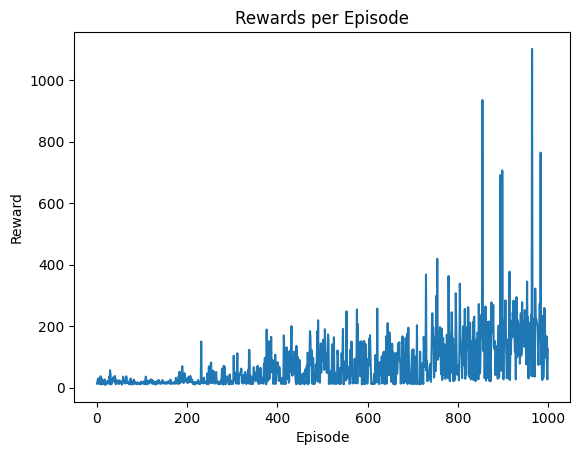

In [65]:
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards per Episode')
plt.show()


arg 1 1
arg 0 1
arg 0 1
arg 1 1
arg 1 1
arg 0 1
arg 0 1
arg 1 1
Len 8 8 184


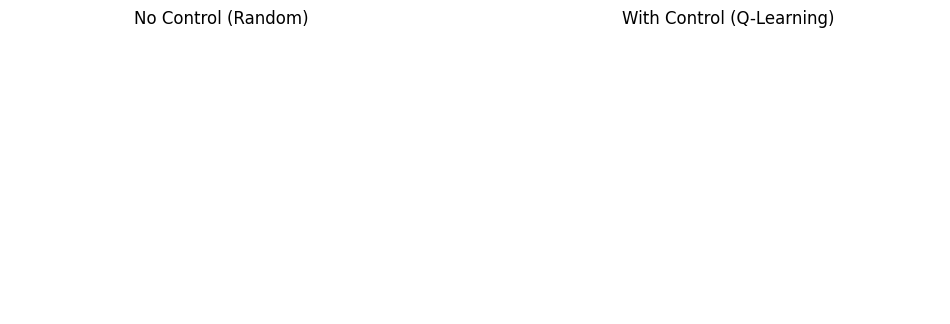

In [66]:
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
rc('animation', html='jshtml')
import random

#env.reset()
#env.unwrapped.state = [0.0, 0.0, 0.3, 0.0]  # [position, velocity, angle, angular velocity]
env.env.length = 0.05  # shorter pole
def capture_episode_frames(policy_fn, title):
    frames = []
    state = env.reset()
    discrete_state = discretize(state, bins)
    done = False
    while not done:
        action = policy_fn(discrete_state)
        next_state, reward, terminated, truncated = env.step(action)
        frame = env.render()
        # Ensure valid RGB frame
        if isinstance(frame, (tuple, list)):
            frame = frame[0]
        elif isinstance(frame, np.ndarray) and frame.shape[0] == 2:
            frame = frame[0]

        frames.append(frame)
        discrete_state = discretize(next_state, bins)
        done = terminated or truncated

    return frames

# 1. Policy: No control (random)
def random_policy(_):
    return env.action_space.sample()

# 2. Policy: Always right (to make pole fall faster)
def right_only_policy(_):
  l = [10000,-1000,-10]
  print("arg",env.action_space.sample(),np.argmax([0,100]))
  return 0#int(random.sample(l,1)[0])
  #return np.random([0,10000,-1000])
# 3. Policy: Trained control
def trained_policy(discrete_state):
    return np.argmax(q_table[discrete_state])

# Capture both runs
frames_random = capture_episode_frames(right_only_policy, "Random Policy")
frames_control = capture_episode_frames(trained_policy, "Trained Policy")

# Display both animations side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title("No Control (Random)")
ax2.set_title("With Control (Q-Learning)")
ax1.axis('off')
ax2.axis('off')

ims = []
min_len = min(len(frames_random), len(frames_control))
print("Len",min_len,len(frames_random), len(frames_control))
for i in range(min_len):
    im1 = ax1.imshow(frames_random[i], animated=True)
    im2 = ax2.imshow(frames_control[i], animated=True)
    ims.append([im1, im2])

ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
display(ani)

